<a href="https://colab.research.google.com/github/xantrich3/xantrich3/blob/main/Spotify_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPOTIFY DATA ANALYSIS PROJECT
## Objective of the Project
The objective of this project is to analyze the data set of Spotify's top songs for 2023, containing information such as chart position, danceability, release year, energy percentage, liveliness percentage, track name and other metrics. The primary goals of this project are to identify the trends in top songs, provide insights based on the information, and create visualization and reports to effectively communicate the findings and insights derived from the analysis.

### Connecting to Google Drive to extract relevant file(s)

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


### Importing Relevant Libraries for Data Cleansing and Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing CSV file

In [ ]:
path="/content/drive/MyDrive/Dataset/spotify-2023.csv"
sp_df=pd.read_csv(path, encoding="ISO-8859-1")

### Viewing the Structure of the DataFrame

In [ ]:
sp_df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


### Cleaning Up the Column Names
After viewing the dataframe, we realize the column headings contain "_" in some of the columns. We need to remove this as this can be confusing when writing code for the dataset.

In [ ]:
sp_df.columns = sp_df.columns.str.replace('_', ' ')

### Checking for Null/NaN Values in the Dataframe

In [ ]:
sp_df.isnull().sum()

track name               0
artist(s) name           0
artist count             0
released year            0
released month           0
released day             0
in spotify playlists     0
in spotify charts        0
streams                  0
in apple playlists       0
in apple charts          0
in deezer playlists      0
in deezer charts         0
in shazam charts        50
bpm                      0
key                     95
mode                     0
danceability %           0
valence %                0
energy %                 0
acousticness %           0
instrumentalness %       0
liveness %               0
speechiness %            0
dtype: int64

### Replacing NaN Values in the DataFrame
We notice that the 'in shazam charts' and 'key' columns there are null values. These null values will be replaced to ensure that there are no null values in the dataframe.

In [ ]:
sp_df['in shazam charts'] = sp_df['in shazam charts'].fillna(0)
sp_df['key']=sp_df['key'].fillna('Unknown')

In [ ]:
sp_df.isnull().sum()

track name              0
artist(s) name          0
artist count            0
released year           0
released month          0
released day            0
in spotify playlists    0
in spotify charts       0
streams                 0
in apple playlists      0
in apple charts         0
in deezer playlists     0
in deezer charts        0
in shazam charts        0
bpm                     0
key                     0
mode                    0
danceability %          0
valence %               0
energy %                0
acousticness %          0
instrumentalness %      0
liveness %              0
speechiness %           0
dtype: int64

### Changing Numeric Values for Relevant Columns to Decimal
We've noticed that certain columns, originally intended to represent percentages, are displaying whole numbers. To enhance the accuracy of the data, we'll need to convert each value in these columns into decimal format.

In [ ]:
sp_df['danceability %']=sp_df['danceability %']/100
sp_df['valence %']=sp_df['valence %']/100
sp_df['energy %']=sp_df['energy %']/100
sp_df['acousticness %']=sp_df['acousticness %']/100
sp_df['instrumentalness %']=sp_df['instrumentalness %']/100
sp_df['liveness %']=sp_df['liveness %']/100
sp_df['speechiness %']=sp_df['speechiness %']/100

### Checking for Duplicates in the Dataframe

In [ ]:
sp_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Length: 953, dtype: bool

In [ ]:
sp_df.duplicated().sum()

0

### Converting Released Date, Month, and Year to Categorical Data Type
In examining the dataframe, we noticed that released date, month and year should be categorical -- not numeric.

In [ ]:
sp_df['released year']=sp_df['released year'].astype('category', copy=False)
sp_df['released day']=sp_df['released day'].astype('category', copy=False)
sp_df['released month']=sp_df['released month'].astype('category', copy=False)

### Observing Basic Data Properties

In [ ]:
sp_df.describe()

,artist count,in spotify playlists,in spotify charts,in apple playlists,in apple charts,in deezer charts,bpm,danceability %,valence %,energy %,acousticness %,instrumentalness %,liveness %,speechiness %
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,0.669696,0.514313,0.642791,0.270577,0.015813,0.182130,0.101312
std,0.893044,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,0.146306,0.234806,0.165505,0.259961,0.084098,0.137112,0.099129
min,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.230000,0.040000,0.090000,0.000000,0.000000,0.030000,0.020000
25%,1.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,0.570000,0.320000,0.530000,0.060000,0.000000,0.100000,0.040000
50%,1.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,0.690000,0.510000,0.660000,0.180000,0.000000,0.120000,0.060000
75%,2.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,0.780000,0.700000,0.770000,0.430000,0.000000,0.240000,0.110000
max,8.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,0.960000,0.970000,0.970000,0.970000,0.910000,0.970000,0.640000


### Ensuring that all changes have been applied to the Dataframe

In [ ]:
sp_df.head(10)

,track name,artist(s) name,artist count,released year,released month,released day,in spotify playlists,in spotify charts,streams,in apple playlists,...,bpm,key,mode,danceability %,valence %,energy %,acousticness %,instrumentalness %,liveness %,speechiness %
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,0.80,0.89,0.83,0.31,0.00,0.08,0.04
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,0.71,0.61,0.74,0.07,0.00,0.10,0.04
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,0.51,0.32,0.53,0.17,0.00,0.31,0.06
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,0.55,0.58,0.72,0.11,0.00,0.11,0.15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,0.65,0.23,0.80,0.14,0.63,0.11,0.06
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,0.92,0.66,0.58,0.19,0.00,0.08,0.24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,0.67,0.83,0.76,0.48,0.00,0.08,0.03
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,0.67,0.26,0.71,0.37,0.00,0.11,0.04
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,0.85,0.22,0.62,0.12,0.00,0.28,0.09
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,0.81,0.56,0.48,0.21,0.00,0.08,0.33


### Assessing the Correlation of the Numerical Values

In [ ]:
sp_df.corr(numeric_only=True)

,artist count,in spotify playlists,in spotify charts,in apple playlists,in apple charts,in deezer charts,bpm,danceability %,valence %,energy %,acousticness %,instrumentalness %,liveness %,speechiness %
artist count,1.000000,-0.101966,-0.018507,-0.051074,-0.088597,-0.003732,-0.038375,0.207027,0.127960,0.137096,-0.101061,-0.050225,0.042730,0.119900
in spotify playlists,-0.101966,1.000000,0.164331,0.708277,0.271317,0.144342,-0.019598,-0.106534,-0.021883,0.033808,-0.064421,-0.028134,-0.046695,-0.089722
in spotify charts,-0.018507,0.164331,1.000000,0.233354,0.552232,0.600205,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765
in apple playlists,-0.051074,0.708277,0.233354,1.000000,0.414523,0.369032,0.023725,-0.025326,0.057075,0.052615,-0.061781,-0.057219,-0.049596,-0.108011
in apple charts,-0.088597,0.271317,0.552232,0.414523,1.000000,0.383668,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539
in deezer charts,-0.003732,0.144342,0.600205,0.369032,0.383668,1.000000,0.028036,0.070913,0.076196,0.094627,-0.029361,0.005398,-0.007568,-0.080555
bpm,-0.038375,-0.019598,0.034713,0.023725,0.030962,0.028036,1.000000,-0.147095,0.041195,0.025794,-0.017694,-0.001195,-0.000761,0.039260
danceability %,0.207027,-0.106534,0.030071,-0.025326,-0.025204,0.070913,-0.147095,1.000000,0.408451,0.198095,-0.236165,-0.089138,-0.077538,0.184977
valence %,0.127960,-0.021883,0.035531,0.057075,0.047733,0.076196,0.041195,0.408451,1.000000,0.357612,-0.081907,-0.132890,0.021278,0.041081
energy %,0.137096,0.033808,0.081920,0.052615,0.104828,0.094627,0.025794,0.198095,0.357612,1.000000,-0.577344,-0.038547,0.117302,-0.004846


### Choosing Seaborn Color Palette for Plotting Visualization

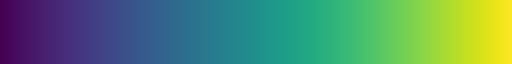

In [ ]:
sns.color_palette("viridis", as_cmap=True)

### Correlation Matrix

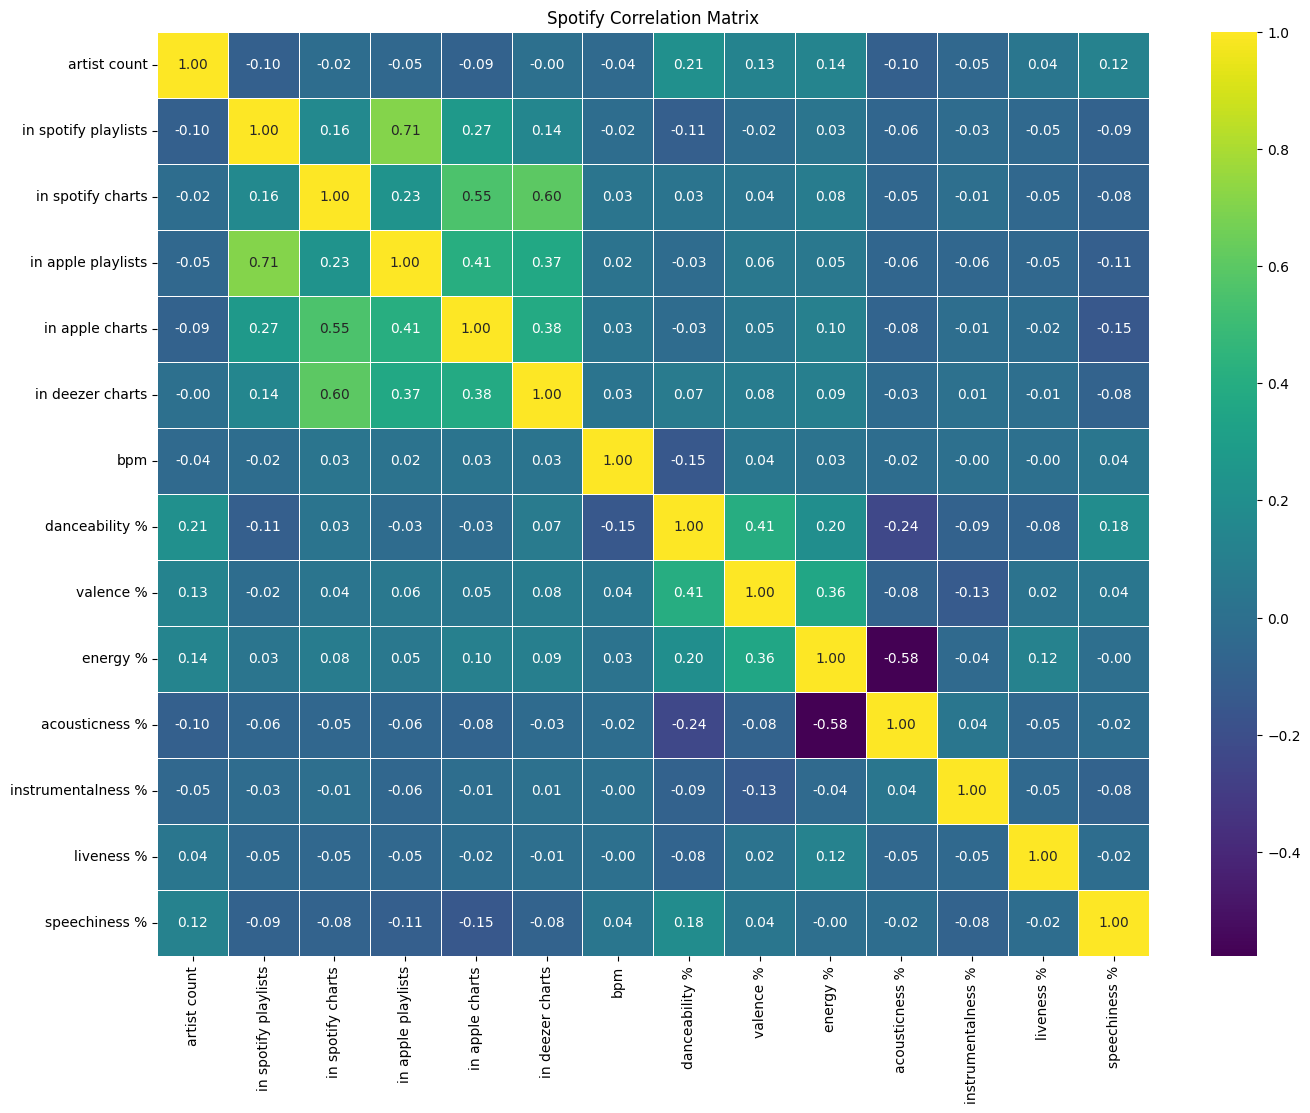

In [ ]:
correlation_matrix = sp_df.corr(numeric_only=True)
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths = 0.5)
plt.title('Spotify Correlation Matrix')
plt.show()

### Export the Data Set
We will now export the cleaned data set for visualization purposes. In the pages below, we utilized a visualization tool to create the respective insights.

In [ ]:
sp_df.to_csv('Spotify 2023 Cleaned DataSet.csv')